# Estudio matemático de las relaciones entre las dimensiones morfológicas y el peso

## Justificación matemática y biológica

La relación entre la longitud y el peso en peces suele seguir la ley cúbica ($W\propto L^{3}$), pero en peces planos como el lenguado, la relación superficie-peso es más adecuada, ya que su cuerpo es achatado y su crecimiento no es isométrico. Los trabajos de [[Froese et al., 2006]](https://doi.org/10.1111/j.1439-0426.2006.00805.x) y [[Haddon et al., 2011]](https://doi.org/10.1111/j.1751-5823.2012.00179\_26.x) pusieron de manifiesto que en peces planos existe una correlación entre el peso del individuo ($W$) y la superficie ($S$) del mismo que viene dada por la expresión matemática:

```{math}
:label: eq_peso-superficie
W=aS^b
```
en donde:
- $a$ es un coeficiente empírico que depende de la especie y las condiciones de cultivo.
- $b$ es un exponente que describe la tasa de crecimiento en función de la superficie.

ya que la altura es menos predictiva que la longitud - anchura (L/A) que sólo contribuye $\sim5\%$ en modelos morfológicos.

Para obtener valores específicos de ay b, se suelen ajustar datos experimentales usando regresión no lineal minimizando el error cuadrático medio:

```{math}
:label: eq_ECM
ECM=\dfrac{1}{N}\sum_{i=1}^N(W_i-aS_i^b)^2
```

[[Torres et al., 2012]](https://doi.org/10.1111/j.1095-8649.2011.03223.x) recoge que en experimentos realizados con peces planos de las familias Soleidae y Pleuronectidae los coeficientes de la ecuación (1) toman los siguientes valores:

```{math}
a\approx0,03\quad b\approx1,1-1,4
```

habiendo estimado que en el caso concreto del lenguado estos coeficientes son: $a=0.024\quad b=1.32$

Los recientes estudios de [[El-Bokhty et al., 2023]](https://doi.org/10.21608/ejabf.2023.322449) ponen en entredicho la ecuación (1) y sugieren que el crecimiento alométrico positivo del lenguado común (*Solea solea*) responde a la variable morfológica de longitud ($L$) que se ajusta a la expresión matemática:

```{math}
:label: eq_peso-longitud
W=a\cdot L^b
```
Concluyendo, en sus trabajos, que los coeficientes de dicha expresión son:

```{math}
a\approx0,00029\quad b\approx3,3777
```

Sin embargo, una investigación realizada en las aguas costeras de Pakistán analizó seis especies de peces planos y encontró variaciones significativas en parámetros como la longitud, la anchura y el peso entre las diferentes especies [[W. Ali et al., 2021]](https://doi.org/10.19080/OFOAJ.2021.14.555884).  Aunque este estudio no presentó una fórmula específica que relacione el peso con la longitud y la anchura simultáneamente, sugiere que la anchura es una medida morfológica relevante en la evaluación de las relaciones morfométricas en peces planos. Ambas variables podrían relacionarse mediante la siguiente expresión matemática:

```{math}
:label: eq_peso-longitud_anchura
W=k\cdot L^a \cdot A^b
```
en donde:
- $W$ = peso,
- $L$ = longitud,
- $A$ = anchura, 
- $k$, $a$, $b$ = parámetros específicos por especie

Por otro lado [[Freitas et al.,2021]](https://doi.org/0.1016/j.aqrep.2021.100676) en sus trabajos con *Paralichthys olivaceus* (falso Halibut del japón) apuntán a que una relación volumétrica es más adecuada si se tiene en cuenta la comprensión dorsoventral. Esta parámetro morfológico actúa como un factor de corrección que hace que el volumen real sea $\approx70-80\%$ de LxAxH, siendo concretamente de $0.72$ en el Halibut. Según estos autores el peso de los peces de esta especie se ajustan a la siguiente fórmula:

```{math}
W=1,05\cdot V^{0,98}
```
que responde a la expresión matemática genérica:

```{math}
:label: eq_peso-volumen
W=a\cdot (c\cdot V)^b
```
en donde:
- $W$ = peso,
- $V$ = volumen obtenido como $L\cdot A \cdot H$
- $L$ = longitud,
- $A$ = anchura,
- $H$ = altura, 
- $c$ = factor de corrección $\leq 1$
- $a$, $b$ = parámetros específicos por especie
  
[[Lee et al., 2019]](https://doi.org/0.1007/s12562-019-01287-2) usaron un escáner 3D para medir el volumen real en *Scophthalmus maximus* (Rodaballo) encontrando que el peso de los ejemplares del estudio se ajustan a la expresión:
```{math}
W=1,12\cdot V-3,25\quad(R^{2}=0,96)
```


## Análisis de modelos peso - morfología 
Se dispone de un dataset `Dimensiones_lenguado.xls` con N=200 registros morfométricos de alevines de lenguado, que incluye medidas de longitud, anchura, altura y peso. Considerando la diversidad de enfoques existentes en la literatura científica, se plantea la evaluación comparativa de distintas expresiones matemáticas que describan la relación entre el peso y las variables morfológicas. En particular, se estudiarán modelos clásicos basados en la relación $W = a \cdot L^b$, $W = a \cdot S^b$ así como formulaciones extendidas que incorporan múltiples dimensiones corporales, como $W = k \cdot L^a \cdot A^b \cdot H^c$, con el objetivo de determinar cuál de estas expresiones proporciona un ajuste más preciso a los datos observados. La selección del modelo óptimo se basará en criterios estadísticos de bondad de ajuste y parsimonia, tales como el coeficiente de determinación ajustado (R² ajustado), el error cuadrático medio (RMSE). 
Los diferentes modelos de ajuste evaluados fueron ejecutados en un entorno Jupyterlab haciendo uso de librerías python especializadas como: pandas, numpy y scikit-learn.

In [3]:
# Cargar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.optimize import curve_fit

plt.style.use('seaborn-v0_8-muted')

# Cargar el dataset
file_path = './data/Dimensiones_lenguado.xlsx'
df = pd.read_excel(file_path)
df.head()

,Peso (g),Longitud (cm),Anchura (cm),Altura (cm)
0,0.46,3.3,1.3,0.2
1,1.08,4.5,1.1,0.3
2,0.67,3.9,1.5,0.2
3,0.98,4.4,1.7,0.3
4,0.93,4.2,1.8,0.3


In [4]:
# Definimos variables comunes
L = df['Longitud (cm)'].values
A = df['Anchura (cm)'].values
H = df['Altura (cm)'].values
W = df['Peso (g)'].values
S = L * A
V = L * A * H
n = len(W)

### 1. Modelo potencia peso - longitud: $W=a\cdot L^b$

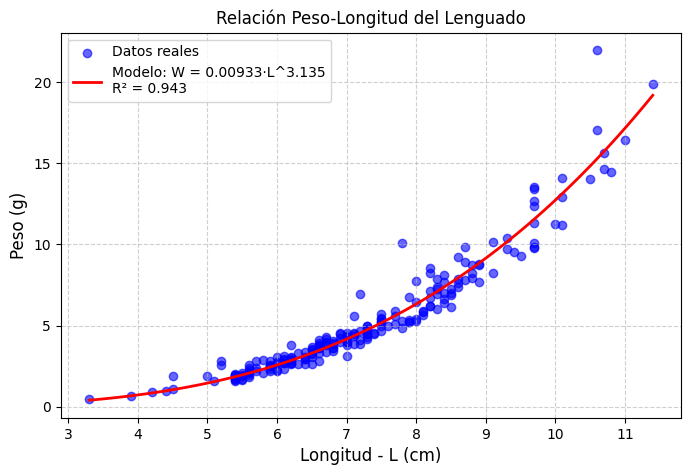

Modelo ajustado: W = 0.00933 · L^3.13480
R² = 0.9433
MAE = 0.5246 g
RSME = 0.8638 g
R² adj = 0.9430 g


In [5]:
def long_model(L,a,b):
    return a*L**b

params_long, _ = curve_fit(long_model, L, W)
a,b = params_long
W_pred_long = long_model(L, a,b)
r2_long = r2_score(W, W_pred_long)
r2_adj_long= 1 - (1 - r2_long) * (n - 1) / (n - 1 - 1)
rmse_long = np.sqrt(mean_squared_error(W, W_pred_long))
mae_long = mean_absolute_error(W, W_pred_long)

# Visualización ajuste

plt.figure(figsize=(8, 5))
plt.scatter(L, W, alpha=0.6, label='Datos reales', color='blue')
L_range = np.linspace(min(L), max(L), 100)
plt.plot(L_range, long_model(L_range, a, b), 'r-', linewidth=2, 
         label=f'Modelo: W = {a:.5f}·L^{b:.3f}\nR² = {r2_long:.3f}')
plt.xlabel('Longitud - L (cm)', fontsize=12)
plt.ylabel('Peso (g)', fontsize=12)
plt.title('Relación Peso-Longitud del Lenguado', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Resultados del ajuste

print(f"Modelo ajustado: W = {a:.5f} · L^{b:.5f}")
print(f"R² = {r2_long:.4f}")
print(f"MAE = {mae_long:.4f} g")
print(f"RSME = {rmse_long:.4f} g")
print(f"R² adj = {r2_adj_long:.4f} g")



### 2. Modelo potencia peso - superficie: $W=a\cdot S^b$

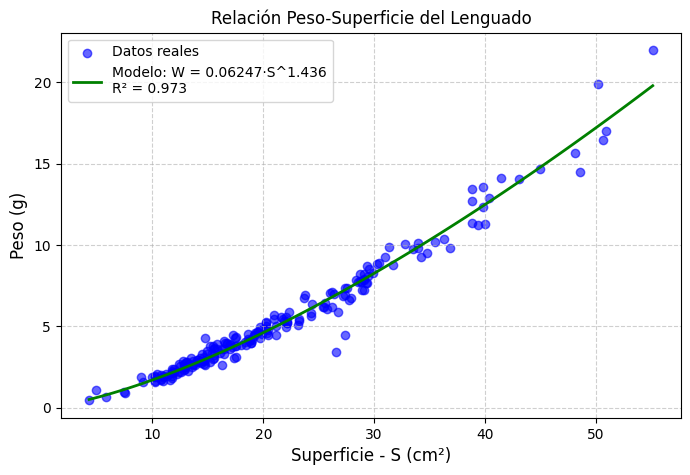

Modelo ajustado: W = 0.06247 · S^1.43623
R² = 0.9733
MAE = 0.3734 g
RSME = 0.5925 g
R² adj = 0.9732 g


In [6]:
def potencia_model(S, a, b):
    return a * (S**b)

params_pow, _ = curve_fit(potencia_model, S, W)
a,b = params_pow
W_pred_pow = potencia_model(S, a, b)
r2_pow = r2_score(W, W_pred_pow)
r2_adj_pow = 1 - (1 - r2_pow) * (n - 1) / (n - 1 - 1)
rmse_pow = np.sqrt(mean_squared_error(W, W_pred_pow))
mae_pow = mean_absolute_error(W, W_pred_pow)

# Visualización ajuste

plt.figure(figsize=(8, 5))
plt.scatter(S, W, alpha=0.6, label='Datos reales', color='blue')
S_range = np.linspace(min(S), max(S), 100)
plt.plot(S_range, long_model(S_range, a, b), 'g-', linewidth=2, 
         label=f'Modelo: W = {a:.5f}·S^{b:.3f}\nR² = {r2_pow:.3f}')
plt.xlabel('Superficie - S (cm²)', fontsize=12)
plt.ylabel('Peso (g)', fontsize=12)
plt.title('Relación Peso-Superficie del Lenguado', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Resultados del ajuste
print(f"Modelo ajustado: W = {a:.5f} · S^{b:.5f}")
print(f"R² = {r2_pow:.4f}")
print(f"MAE = {mae_pow:.4f} g")
print(f"RSME = {rmse_pow:.4f} g")
print(f"R² adj = {r2_adj_pow:.4f} g")